# Input data for BISICLES

This notebook looks at some of the files that I am using as inputs to BISICLES.

In [1]:
import os
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib

from xy2ll import xy2ll

### Colormap

Making a useful colormap for plotting land/ocean maps

/var/folders/d9/3tqzv4xj1sx00nng1hd597500000gn/T/ipykernel_21930/3115812991.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  Blues = cm.get_cmap('Blues_r', 128)
/var/folders/d9/3tqzv4xj1sx00nng1hd597500000gn/T/ipykernel_21930/3115812991.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  Greens = cm.get_cmap('Greens_r', 128)
/var/folders/d9/3tqzv4xj1sx00nng1hd597500000gn/T/ipykernel_21930/3115812991.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  terrain = cm.get_cmap('

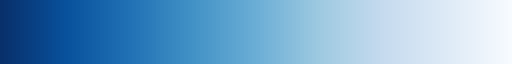

In [2]:
Blues = cm.get_cmap('Blues_r', 128)
Greens = cm.get_cmap('Greens_r', 128)
terrain = cm.get_cmap('terrain', 128)
Blues

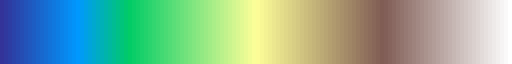

In [3]:
terrain

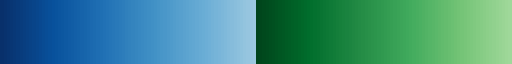

In [4]:
blue_colours = Blues(np.linspace(0, 1, 128))
green_colours = Greens(np.linspace(0, 1, 128))
trn_colours = terrain(np.linspace(0, 1, 128))
colours = np.concatenate((blue_colours[0:80, :], green_colours[0:80,:]), axis=0)
cmp = ListedColormap(colours)
cmp

### Data

In [5]:
path = '/Users/jonniebarnsley/data/phd/Control/BISICLES_inputs'
filenames = os.listdir(path)
netcdfs = sorted([name for name in filenames if '.nc' in name])
print(*netcdfs, sep='\n')

PRISM_temp_from_10kyr_spinup_rundir006.nc
RACMO_T2m_1979_2000_8000m_T2m_768.nc
RACMO_T2m_precip_1979_2000_761.nc
RACMO_T2m_precip_1979_2000_8000m_height_768.nc
RACMO_precip_1979_2000_8000m_precip_768.nc
bedmachine_modified_bedrock_geometry_1km_6144.nc
ccsm4uoft_E280_orog_6080x6080km_8km_Antarctic_stereo_Antarctic_stereo_orog_768.nc
ccsm4uoft_E280_pr_pr_regridded_8000m_precip_768.nc
ccsm4uoft_E280_tas_tas_regridded_8000m_temp_768.nc
ccsm4uoft_Eoi400_orog_6080x6080km_8km_Antarctic_stereo_Antarctic_stereo_orog_768.nc
ccsm4uoft_Eoi400_pr_pr_regridded_8000m_precip_768.nc
ccsm4uoft_Eoi400_tas_tas_regridded_8000m_temp_768.nc
cesm_E280_orog_6080x6080km_8km_Antarctic_stereo_Antarctic_stereo_orog_768.nc
cesm_E280_pr_pr_regridded_8000m_precip_768.nc
cesm_E280_tas_tas_regridded_8000m_temp_768.nc
cesm_Eoi400_orog_6080x6080km_8km_Antarctic_stereo_Antarctic_stereo_orog_768.nc
cesm_Eoi400_pr_pr_regridded_8000m_precip_768.nc
cesm_Eoi400_tas_tas_regridded_8000m_temp_768.nc
cosmos_E280_TotalPrecip_pr_reg

In [6]:
def open_file(name):
    filepath = os.path.join(path, name)
    file = xr.open_dataset(filepath)
    return file

In [7]:
def plot_Antarctica(x, y, data, title=None, units=None, cmap=None, vmin=None, vmax=None):

    fig = plt.figure()
    ax = plt.axes(
        projection=ccrs.SouthPolarStereo(),
        title=title
        )
    im = ax.pcolormesh(x, y, data, cmap=cmap, vmin=vmin, vmax=vmax)
    fig.colorbar(im, label=units)
    return ax

## RACMO

In [9]:
def plot_RACMO(x, y, data):
    
    fig = plt.figure()
    ax = plt.axes(projection=ccrs.SouthPolarStereo())
    im = ax.pcolormesh(x, y, data)
    ax.coastlines()
    fig.colorbar(im)

In [13]:
file = open_file('RACMO_T2m_precip_1979_2000_761.nc')
file

<xarray.Dataset>
Dimensions:  (time: 12, x: 761, y: 761)
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * x        (x) float64 -3.04e+06 -3.032e+06 -3.024e+06 ... 3.032e+06 3.04e+06
  * y        (y) float64 -3.04e+06 -3.032e+06 -3.024e+06 ... 3.032e+06 3.04e+06
    lat      (x, y) float64 ...
    lon      (x, y) float64 ...
Data variables:
    T2m      (time, x, y) float64 ...
    precip   (time, x, y) float64 ...
    height   (x, y) float64 ...
Attributes:
    Conventions:   CF-1.4
    source:        RACMO2
    Domain:        ANT27
    Experiment:    ERAINx_RACMO2.4.1
    institution:   Royal Netherlands Meteorological Institute (KNMI)
    CreationDate:  Tue Jan  8 13:38:22 2019
    comment:       asim2cdf: cpar=t2m, iwmo=11, ilvt=105, ilev=2, idh=3, ihac...
    title:         2-m Temperature
    history:       Wed Nov 13 09:36:04 2019: ncrcat -O /scratch/ms/nl/rumw/ex...
    NCO:           netCDF Operators version 4.7.8 (Homepage = http://nco.sf.n...
    meshName:      6080x6080km_8km_Antarctic_stereo

        xy2ll: creating coordinates in south polar stereographic (Std Latitude: 71degS Meridian: 0deg)
        xy2ll: creating coordinates in south polar stereographic (Std Latitude: 71degS Meridian: 0deg)


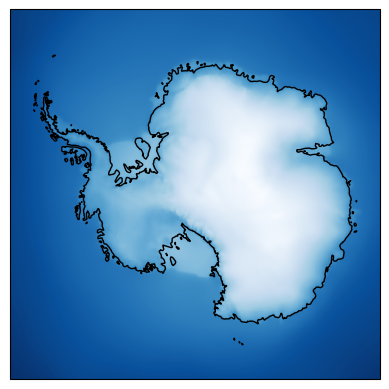

In [65]:
T2m = file['T2m'].mean(dim='time')

T2m.shape
xs = np.linspace(-3_950_000, 3_950_000, 761)
ys = np.linspace(-3_950_000, 4_350_000, 761)
lat, lon = xy2ll(xs, ys, -1)

x = file.x.values
y = file.y.values
lat, lon = xy2ll(x, y, -1)

fig = plt.figure()
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()

kw = dict(central_latitude=-90, central_longitude=0, true_scale_latitude=-70)
cs = ax.pcolormesh(x, y, T2m, cmap=plt.cm.Blues,
                   transform=ccrs.Stereographic(**kw))


In [57]:
file['y']

<xarray.DataArray 'y' (y: 761)>
array([-3040000., -3032000., -3024000., ...,  3024000.,  3032000.,  3040000.])
Coordinates:
  * y        (y) float64 -3.04e+06 -3.032e+06 -3.024e+06 ... 3.032e+06 3.04e+06

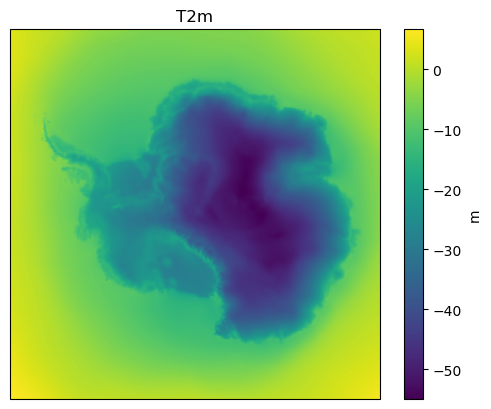

In [8]:
x = file.x
y = file.y
T2m = file.T2m.mean(dim='time') - 273.15
ax = plot_Antarctica(x, y, T2m, title='T2m', units='m')

<GeoAxes: title={'center': 'Precipitation'}>

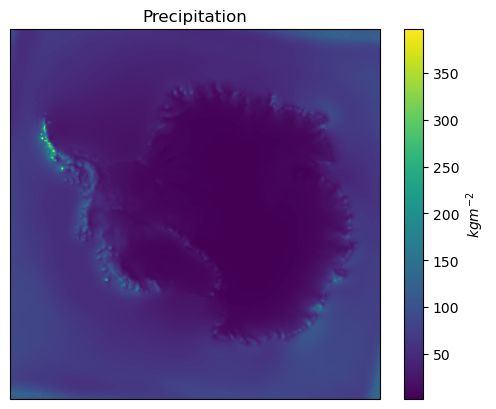

In [9]:
precip = file.precip.mean(dim='time')
plot_Antarctica(x, y, precip, title='Precipitation', units='$kg m^{-2}$')

<GeoAxes: title={'center': 'heigh'}>

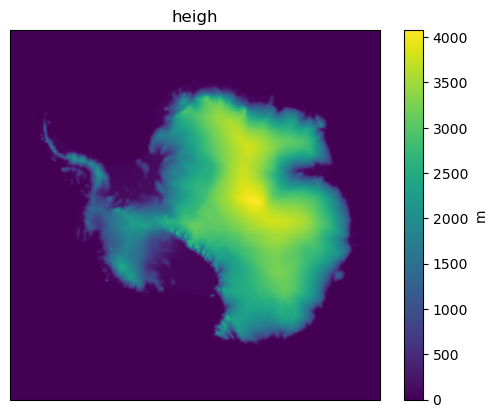

In [10]:
height = file.height
plot_Antarctica(x, y, height, title='heigh', units='m')

## BedMachine

In [8]:
file = open_file('bedmachine_modified_bedrock_geometry_1km_6144.nc')
file

<xarray.Dataset>
Dimensions:  (x: 6144, y: 6144)
Coordinates:
  * x        (x) int64 500 1500 2500 3500 ... 6140500 6141500 6142500 6143500
  * y        (y) int64 500 1500 2500 3500 ... 6140500 6141500 6142500 6143500
Data variables:
    topg     (x, y) float32 ...
    thck     (x, y) float32 ...
    mask     (x, y) int8 ...
Attributes:
    topg:     ['units', 'meters above sea level']
    thck:     ['units', 'meters']
    history:  bedmachine downsampled and cropped to conform with bisicles gri...

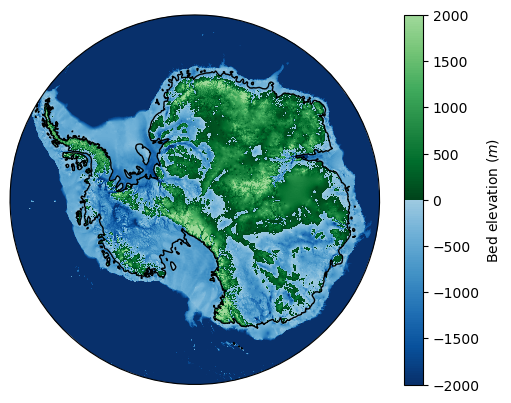

In [13]:
import matplotlib.patches as  mpath

x = file.x - 3071750.0
y = file.y - 3071750.0
topg = file.topg
thck = file.thck

#plot_Antarctica(x, y, topg, units='Bed elevation ($m$)', cmap=cmp, vmin=-2000, vmax=2000)

fig = plt.figure()
ax = plt.axes(projection=ccrs.SouthPolarStereo())

kw = dict(central_latitude=-90, central_longitude=0, true_scale_latitude=-70)
im = ax.pcolormesh(x, y, topg, cmap=cmp, vmin=-2000, vmax=2000, transform=ccrs.Stereographic(**kw))
ax.coastlines(lw=1)

fig.colorbar(im, label='Bed elevation ($m$)')

# Add circular boundary
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)

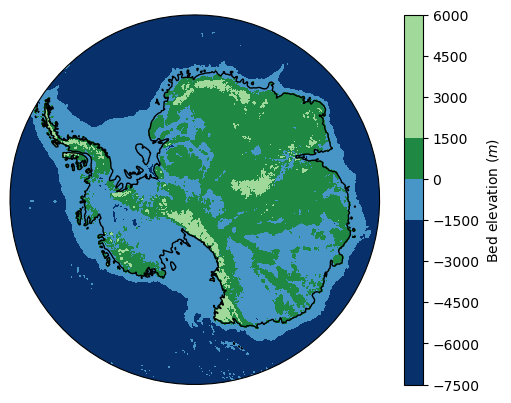

In [14]:
x = file.x - 3071750.0
y = file.y - 3071750.0
topg = file.topg
thck = file.thck

#plot_Antarctica(x, y, topg, units='Bed elevation ($m$)', cmap=cmp, vmin=-2000, vmax=2000)

fig = plt.figure()
ax = plt.axes(projection=ccrs.SouthPolarStereo())

kw = dict(central_latitude=-90, central_longitude=0, true_scale_latitude=-70)
im = ax.contourf(x, y, topg, 10, cmap=cmp, vmin=-2000, vmax=2000, transform=ccrs.Stereographic(**kw))
ax.coastlines(lw=1)

fig.colorbar(im, label='Bed elevation ($m$)')

# Add circular boundary
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)

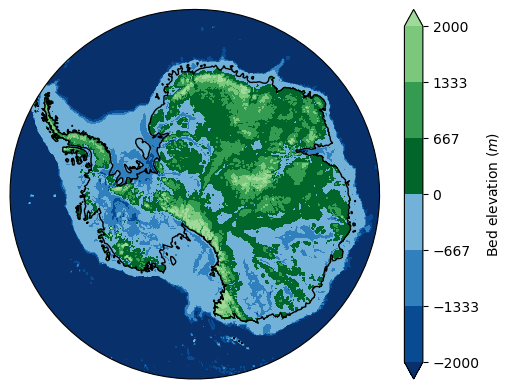

In [20]:
coarse = topg.coarsen(x=8, y=8).mean()

x = coarse.x - 3071750.0
y = coarse.y - 3071750.0

#plot_Antarctica(x, y, topg, units='Bed elevation ($m$)', cmap=cmp, vmin=-2000, vmax=2000)

fig = plt.figure()
ax = plt.axes(projection=ccrs.SouthPolarStereo())

kw = dict(central_latitude=-90, central_longitude=0, true_scale_latitude=-70)
im = ax.contourf(x, y, coarse, levels = np.linspace(-2000, 2000, 7), cmap=cmp, vmin=-2000, vmax=2000, transform=ccrs.Stereographic(**kw), extend='both')
ax.coastlines(lw=1)

fig.colorbar(im, label='Bed elevation ($m$)')

# Add circular boundary
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)

In [53]:
coarse = topg.coarsen(x=12, y=12).mean()

x = coarse.x - 3071750.0
y = coarse.y - 3071750.0

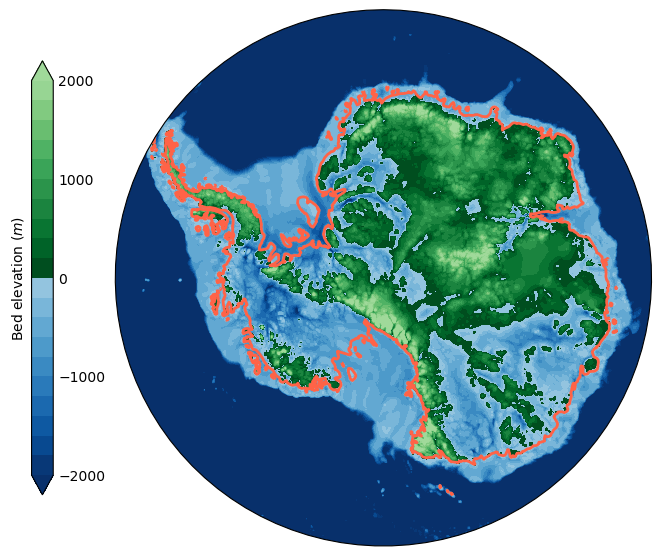

In [57]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())

kw = dict(central_latitude=-90, central_longitude=0, true_scale_latitude=-70)
im = ax.contourf(x, y, coarse, levels = np.linspace(-2000, 2000, 21), cmap=cmp, vmin=-2000, vmax=2000, transform=ccrs.Stereographic(**kw), extend='both')
ax.coastlines('50m', lw=2, color='tomato')


cbar = fig.colorbar(im, location='left', label='Bed elevation ($m$)', fraction=0.035, ticks=[-2000, -1000, 0, 1000, 2000])
cbar.ax.tick_params(size=0)
cbar.ax.yaxis.set_ticks_position('right')

# Add circular boundary
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
plt.savefig('./plots/bedelevation.pdf', format='pdf')

## CCSM4

In [48]:
file = open_file('ccsm4uoft_E280_orog_6080x6080km_8km_Antarctic_stereo_Antarctic_stereo_orog_768.nc')
file

<xarray.Dataset>
Dimensions:  (y: 768, x: 768)
Coordinates:
  * y        (y) float64 -3.068e+06 -3.06e+06 -3.052e+06 ... 3.06e+06 3.068e+06
  * x        (x) float64 -3.068e+06 -3.06e+06 -3.052e+06 ... 3.06e+06 3.068e+06
Data variables:
    orog     (y, x) float64 ...

<GeoAxes: title={'center': 'Orogrpahy'}>

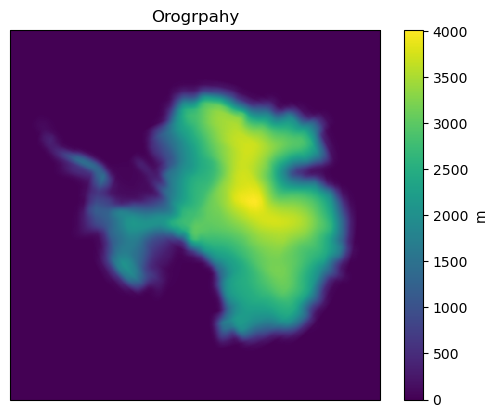

In [50]:
x = file.x
y = file.y
orog = file.orog

plot_Antarctica(x, y, orog, title='Orogrpahy', units='m')

In [17]:
file = open_file('ccsm4uoft_E280_tas_tas_regridded_8000m_temp_768.nc')
file

<xarray.Dataset>
Dimensions:  (t: 12, y: 768, x: 768)
Coordinates:
  * t        (t) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * y        (y) float64 -3.068e+06 -3.06e+06 -3.052e+06 ... 3.06e+06 3.068e+06
  * x        (x) float64 -3.068e+06 -3.06e+06 -3.052e+06 ... 3.06e+06 3.068e+06
Data variables:
    temp     (t, y, x) float64 ...

<GeoAxes: title={'center': 'E280 Temperature'}>

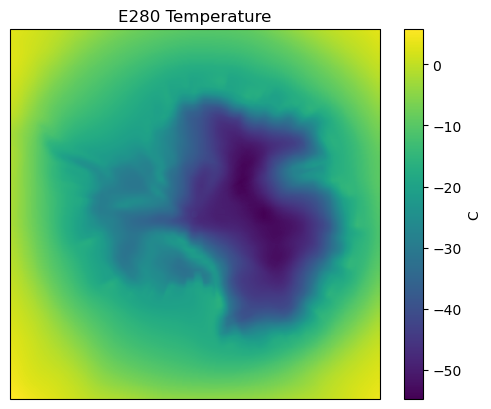

In [18]:
x = file.x
y = file.y
E280temp = file.temp.mean(dim='t')

plot_Antarctica(x, y, E280temp, title='E280 Temperature', units='C')

In [19]:
file = open_file('ccsm4uoft_Eoi400_tas_tas_regridded_8000m_temp_768.nc')
file

<xarray.Dataset>
Dimensions:  (t: 12, y: 768, x: 768)
Coordinates:
  * t        (t) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * y        (y) float64 -3.068e+06 -3.06e+06 -3.052e+06 ... 3.06e+06 3.068e+06
  * x        (x) float64 -3.068e+06 -3.06e+06 -3.052e+06 ... 3.06e+06 3.068e+06
Data variables:
    temp     (t, y, x) float64 ...

<GeoAxes: title={'center': 'Eoi400 Temperature'}>

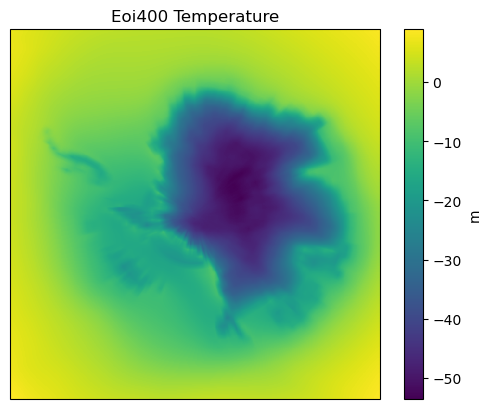

In [20]:
x = file.x
y = file.y
Eoi400temp = file.temp.mean(dim='t')

plot_Antarctica(x, y, Eoi400temp, title='Eoi400 Temperature', units='m')

<GeoAxes: >

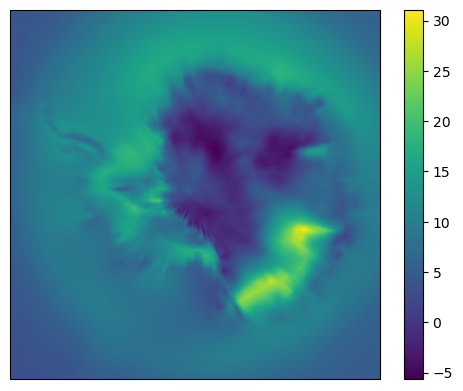

In [21]:
diff = Eoi400temp-E280temp
plot_Antarctica(x, y, diff)

In [73]:
matplotlib.__version__

'3.7.1'